Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and Analysis

In [2]:
# loading the data from csv file
customer_data = pd.read_csv('/content/Mall_Customers.csv')


In [7]:
customer_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#getting numbers of rows and columns
customer_data.shape

(200, 5)

In [9]:
# getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# number of null data in the dataset
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing anual income column and spending score column


In [12]:
X = customer_data.iloc[:,[3,4]].values

Choosing number of clusters

WCSS -> within cluster sum of squares

In [13]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=42 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

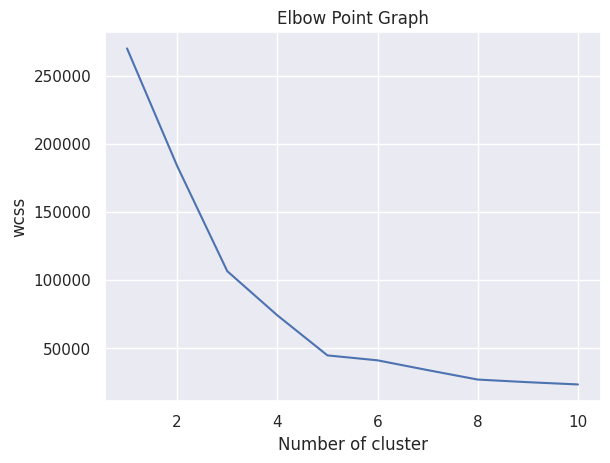

In [14]:
# ploting the elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()


Number of optimal Cluster = 5

Traning the k-means Clustering Model

In [17]:
Kmeans = KMeans(n_clusters = 5, init ="k-means++", random_state =0)

# returning a label for each datapoint based on their cluster

Y = Kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing all the clusters

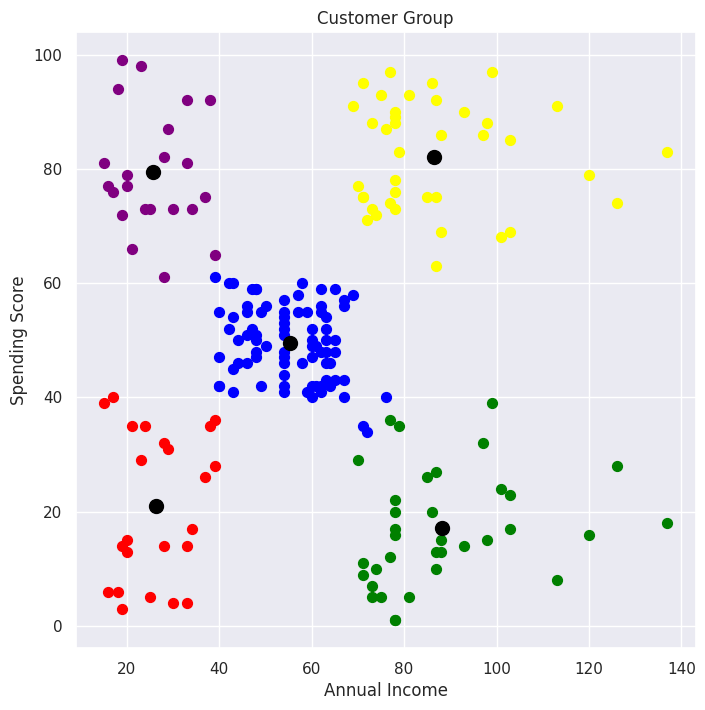

In [20]:
#ploting all the clusters and the centeroid
plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s=50,c='blue',label='cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50,c='yellow',label='cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50,c='green',label='cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1],s=50,c='red',label='cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1],s=50,c='purple',label='cluster5')

#plot the centeroid
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100,c='black', label ='centeroid')

plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()